In [74]:
import pandas as pd

# Load data
data = pd.read_csv(r"C:\Users\abrao\Documents\Archive\Cloud Track Exam Files (1)\Cloud Track Exam Files\Datasets\AI\ict_ai_question\cleaned_all_phones.csv")
data.head(5)

,phone_name,brand,os,inches,resolution,battery,battery_type,ram(GB),announcement_date,weight(g),...,video_1080p,video_4K,video_8K,video_30fps,video_60fps,video_120fps,video_240fps,video_480fps,video_960fps,price(USD)
0,Y6II Compact,Huawei,Android 5.1,5.0,720x1280,2200,Li-Po,2,2016-09-01,140.0,...,False,False,False,True,False,False,False,False,False,120.0
1,K20 plus,LG,Android 7.0,5.3,720x1280,2700,Li-Ion,2,2016-12-01,140.0,...,True,False,False,True,False,False,False,False,False,100.0
2,P8 Lite (2017),Huawei,Android 7.0,5.2,1080x1920,3000,Li-Ion,4,2017-01-01,147.0,...,True,False,False,True,False,False,False,False,False,420.0
3,Redmi Note 4,Xiaomi,Android 6.0,5.5,1080x1920,4100,Li-Po,4,2017-01-01,165.0,...,True,False,False,True,False,True,False,False,False,150.0
4,P10,Huawei,Android 7.0,5.1,1080x1920,3200,Li-Ion,4,2017-02-01,145.0,...,True,True,False,True,True,False,False,False,False,420.0


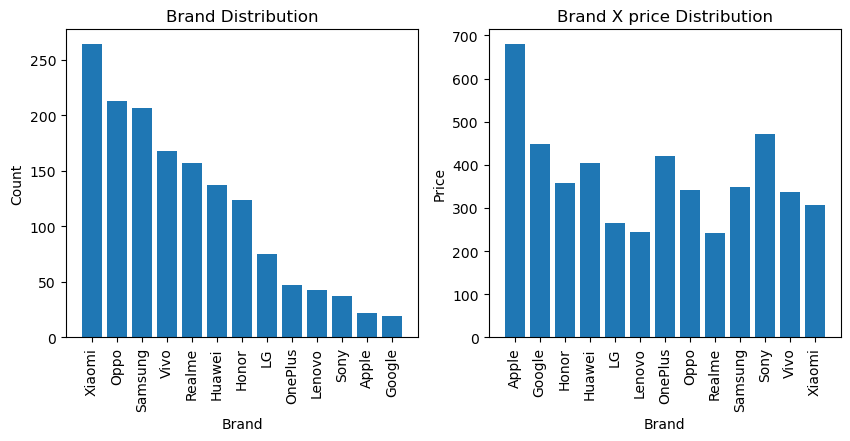

In [174]:
import matplotlib.pyplot as plt

# Plot
brand_count = pd.DataFrame(data['brand'].value_counts(sort=True))
brand_price = data.groupby('brand')['price(USD)'].mean()

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.bar(brand_count.index.values, brand_count['count'].values)
plt.xlabel('Brand')
plt.ylabel('Count')
plt.title('Brand Distribution')
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
plt.bar(brand_price.index.values, brand_price.values)
plt.xlabel('Brand')
plt.ylabel('Price')
plt.title('Brand X price Distribution')
plt.xticks(rotation=90)

plt.show()

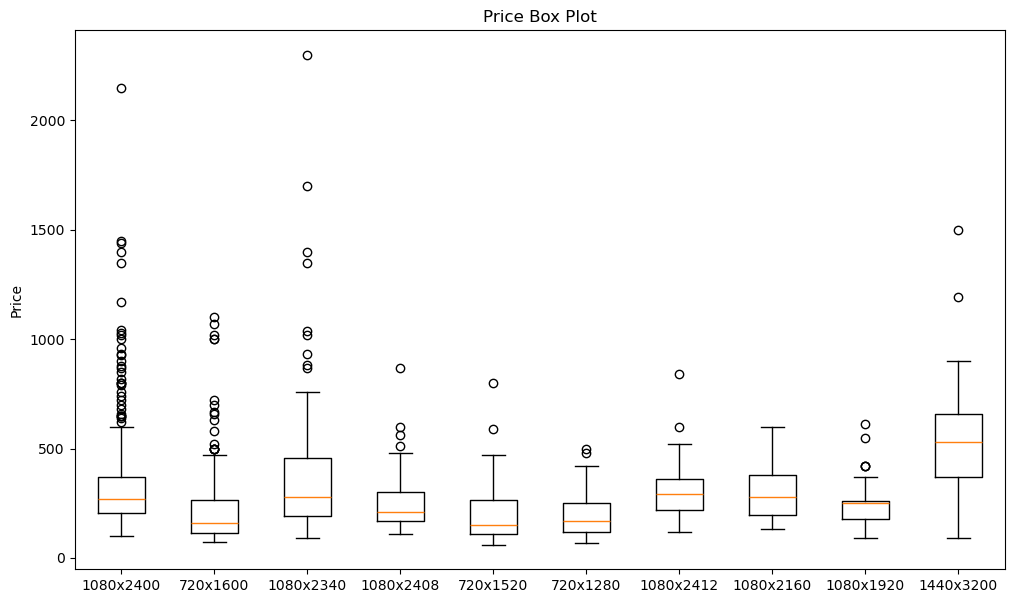

In [173]:
resolutions = data['resolution'].value_counts().index.values[0:10]
to_plot = []
labels = []

for i in resolutions:
    to_plot.append(data[data['resolution'] == i]['price(USD)'])
    labels.append(i)

plt.figure(figsize=(12, 7))
plt.boxplot(to_plot, labels=labels)
plt.ylabel('Price')
plt.title('Price Box Plot')
plt.show()

In [182]:
df = data.copy()
x = df[['inches', 'battery', 'ram(GB)', 'weight(g)', 'storage(GB)']]
y = df['price(USD)']

x.head(5)

,inches,battery,ram(GB),weight(g),storage(GB)
0,5.0,2200,2,140.0,16
1,5.3,2700,2,140.0,16
2,5.2,3000,4,147.0,16
3,5.5,4100,4,165.0,32
4,5.1,3200,4,145.0,32


In [225]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

def preprocessing(data, label, test_size=0.2):
    scaler = StandardScaler()
    x_scaled = scaler.fit_transform(data)
    y_scaled = scaler.fit_transform(np.asarray(y).reshape(-1, 1))
    return train_test_split(x_scaled, y_scaled, test_size=0.2)

x_train, x_test, y_train, y_test = preprocessing(x, y)

print('Number transactions x_train dataset:', x_train.shape)
print('Number transactions y_train dataset:', y_train.shape)
print('Number transactions x_test dataset:', x_test.shape)
print('Number transactions y_test dataset:', y_test.shape)

Number transactions x_train dataset: (1209, 5)
Number transactions y_train dataset: (1209, 1)
Number transactions x_test dataset: (303, 5)
Number transactions y_test dataset: (303, 1)


In [274]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, accuracy_score

models = [['KNeighbors', KNeighborsRegressor()],
         ['Random Forest', RandomForestRegressor()],
         ['SVM', SVR()],
         ['SGD', SGDRegressor()],
         ['GradientBoosting', GradientBoostingRegressor()]]

In [275]:
for i in models:
    model = i[1].fit(x_train, y_train)
    print(f'{i[0]}: {model.predict(x_test)}')

KNeighbors: [[-0.74946592]
 [-0.27694099]
 [ 0.33057456]
 [ 0.02214478]
 [-0.7794675 ]
 [ 2.53119065]
 [-0.37444614]
 [ 1.56439114]
 [-0.27844857]
 [-0.66696157]
 [-0.22488825]
 [-0.48590202]
 [-0.20943743]
 [-0.23943902]
 [ 0.4678483 ]
 [-0.53195445]
 [-0.6219592 ]
 [-0.56195603]
 [ 0.06807721]
 [ 0.28253452]
 [-0.19443664]
 [ 0.21633003]
 [ 1.5824071 ]
 [ 2.48320462]
 [-0.48766461]
 [-0.41944851]
 [ 1.50065278]
 [-0.13818367]
 [-0.27844857]
 [ 0.86138506]
 [-0.05950452]
 [ 0.06057681]
 [-0.71270798]
 [-0.05193662]
 [-0.02192754]
 [-0.26202271]
 [-0.48590202]
 [ 0.50130006]
 [ 1.87974528]
 [-0.4551504 ]
 [-0.59945801]
 [-0.46445089]
 [ 0.17308275]
 [ 0.54810253]
 [-0.07863953]
 [ 0.367343  ]
 [ 0.11307958]
 [-0.4419587 ]
 [-0.04443623]
 [-0.50136033]
 [-0.73144397]
 [-0.14118383]
 [ 0.52635138]
 [-0.34426005]
 [ 0.187326  ]
 [ 0.06057681]
 [-0.11193229]
 [ 1.6356599 ]
 [-0.2429117 ]
 [ 0.5247688 ]
 [-0.2429117 ]
 [-0.12693308]
 [-0.52604414]
 [ 0.87341719]
 [-0.53195445]
 [ 0.48809937

C:\Users\abrao\AppData\Local\Temp\ipykernel_312\351532293.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = i[1].fit(x_train, y_train)


Random Forest: [-0.56773628 -0.3690396   0.31655234  0.87981312 -0.90930747  3.80186268
 -0.50292792  4.82967528  0.01743618 -0.45207936 -0.51724517  0.9807296
 -0.08920142 -0.04626282 -0.25508522 -0.48951166 -0.88006656 -0.52715181
 -0.19141461  0.15564382 -0.10742493  0.10588745  0.88441458  1.18964748
  0.12632528 -0.87754054  3.05448725  0.01900889 -0.27929193  0.27892658
  0.49853697  0.93023269 -0.89904346  0.25036555  0.01275448  0.03263896
  0.9807296   0.12943353  0.85525123 -0.03010035 -0.48358985 -0.43474244
  0.30343253  0.33725873  0.24875763  0.0620415  -0.13359638 -0.15458196
  0.06359771 -0.26360244 -0.66634145 -0.13416941  0.92236915 -0.80695523
  0.01850322  0.46895231  0.08484115  0.86769364  0.047617    0.09932986
  0.01260892 -0.08975587 -0.1974691   2.27230699 -0.36933962 -0.32863122
  1.97996498  0.2294991  -0.27859853  0.39482189 -0.13890945 -0.17132717
  0.15564382 -0.46836559 -0.02767784  0.89699356 -0.37297912 -0.00917012
 -0.3456852   0.4143626  -0.34947057 

C:\Users\abrao\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\abrao\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\abrao\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [305]:
to_df = []
trained_models = []

for i in models:
    model = i[1].fit(x_train, y_train)
    y_pred = model.predict(x_test)
    trained_models.append(model)
    to_df.append([i[0], mean_squared_error(y_test, y_pred)])

evaluate = pd.DataFrame(to_df, columns=['Model', 'MSE'])
evaluate

C:\Users\abrao\AppData\Local\Temp\ipykernel_312\4286903934.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = i[1].fit(x_train, y_train)
C:\Users\abrao\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\abrao\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\abrao\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exampl

,Model,MSE
0,KNeighbors,0.926872
1,Random Forest,0.975797
2,SVM,0.873909
3,SGD,0.915547
4,GradientBoosting,0.844686


In [316]:
from sklearn.model_selection import GridSearchCV, cross_val_score

param_grid = {'n_neighbors': range(1, 10), 'weights': ['uniform', 'distance']}

grid_search = GridSearchCV(estimator=trained_models[0], param_grid=param_grid, cv=5)
model = grid_search.fit(x_train, y_train)
new_score = model.predict(x_test)
print(f'old score: {evaluate.iloc[0, 1]}, new score: {mean_squared_error(y_test, new_score)}')

old score: 0.9268719962409276, new score: 0.8612605376785506
